## - 불러올 패키지 목록

In [1]:
# 파이썬 기본 패키지
import math  # 수학 함수 패키지
import itertools  # Functions creating iterators for efficient looping

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.formula.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
from statsmodels.multivariate.pca import PCA as pca  # 대문자로 사용할 경우 sklearn 의 PCA와 겹침

# 시계열 관련 statsmodels 패키지
from statsmodels.tsa.api import *
from statsmodels.tsa.ar_model import *
from statsmodels.tsa.arima.model import *
from statsmodels.tsa.arima_process import *
from statsmodels.tsa.statespace import *
from statsmodels.graphics.api import *
from statsmodels.graphics.tsaplots import *

# SciPy 패키지
import scipy as sp
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# pingouin 패키지
import pingouin as pg

# scikit-learn 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공
from sklearn.multiclass import OneVsRestClassifier  # multiclass 분류기 알고리즘 제공

# mlxtend 패키지
from mlxtend.preprocessing import *  # 연관분석에 필요한 트랜잭션 전처리 알고리즘 포함
from mlxtend.frequent_patterns import *  # 연관분석에 사용되는 알고리즘 포함 
from mlxtend.plotting import plot_decision_regions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS  # 변수선택 알고리즘 포함
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False
#
#

# Dataset 불러오기 및 data 정보 확인

## 데이터 불러오기

In [2]:
# 분석할 데이터 불러오기 / 데이터프레임 생성
df_credit = pd.read_csv(r'C:\Users\Boanerges\GitHub\TIL\rawdata\credit_final.csv')

df_credit

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,2,2,3,...,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,...,1,4,52,2,2,1,4,1,2,1


## data 정보 확인

In [3]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   credit.rating                   1000 non-null   int64
 1   account.balance                 1000 non-null   int64
 2   credit.duration.months          1000 non-null   int64
 3   previous.credit.payment.status  1000 non-null   int64
 4   credit.purpose                  1000 non-null   int64
 5   credit.amount                   1000 non-null   int64
 6   savings                         1000 non-null   int64
 7   employment.duration             1000 non-null   int64
 8   installment.rate                1000 non-null   int64
 9   marital.status                  1000 non-null   int64
 10  guarantor                       1000 non-null   int64
 11  residence.duration              1000 non-null   int64
 12  current.assets                  1000 non-null   int64
 13  age 

# 모델 학습에 사용할 x값(예측변수) 설정

In [4]:
x = df_credit.iloc[:,1:21]
y = df_credit.iloc[:,0]

# 학습/테스트용 데이터셋 분리

In [5]:
# 데이터셋 나누고 라벨 분포 확인
x_train, x_test, y_train, y_test  = train_test_split( x, y,
                                                      test_size = 0.3,
                                                      random_state = 154 )
# 라벨별 데이터 분포 확인
print( Counter(y_train) )
print()
print( Counter(y_test) )

Counter({1: 490, 0: 210})

Counter({1: 210, 0: 90})


# 모델 생성 및 학습

## kNN 모델 생성

- `sklearn.neighbors.KNeighborsClassifier( n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs )`  
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [6]:
# 일관된 조건으로 군집화 및 평가를 하기 위해 함수로 정의하여 사용

def knn(k):
    cluster_knn = KNeighborsClassifier( n_neighbors=k )
    return cluster_knn

# n_neighborsint: default=5
# weights: {‘uniform’, ‘distance’} or callable, default=’uniform’
# metric: str or callable, default=’minkowski’

## train 데이터로 학습 수행

In [7]:
# k = 3, weight = 'distance' 조건으로 모델 학습
model_knn = knn(15).fit( x_train, y_train )

In [8]:
# 모델의 정답에 대한 정보 확인
model_knn.classes_

array([0, 1], dtype=int64)

# 예측 및 평가

## 학습된 모델로 예측 수행

In [9]:
# test 데이터로 라벨 예측
y_pred = model_knn.predict( x_test )

pd.DataFrame( {'y_True' : y_test,
               'y_Predict' : y_pred,
               'Pred_Result' : y_test == y_pred} ).head(10)

,y_True,y_Predict,Pred_Result
135,1,1,True
91,1,1,True
391,1,1,True
953,0,1,False
927,0,1,False
570,1,1,True
46,1,0,False
759,0,1,False
690,1,1,True
192,1,0,False


## 평가

### Confusion Metrix

In [10]:
conf_mat = pd.crosstab( y_test, y_pred, rownames=['pred'], colnames=['real'] )
conf_mat

real,0,1
pred,,
0,9,81
1,12,198


In [11]:
confusion_matrix(y_test, y_pred)

array([[  9,  81],
       [ 12, 198]], dtype=int64)

### 분석 지표

In [12]:
# Accuracy
model_knn.score( x_test, y_test )

0.69

In [13]:
print( 'Accuracy: ', accuracy_score(y_test, y_pred) )
print()

print( classification_report(y_test, y_pred, digits = 3) )
print()

Accuracy:  0.69

              precision    recall  f1-score   support

           0      0.429     0.100     0.162        90
           1      0.710     0.943     0.810       210

    accuracy                          0.690       300
   macro avg      0.569     0.521     0.486       300
weighted avg      0.625     0.690     0.616       300




In [14]:
y.unique()

array([1, 0], dtype=int64)

In [15]:
model_knn = KNeighborsClassifier()

cv_score = cross_val_score( model_knn, x, y, scoring = 'accuracy', cv=20 )

cv_score.mean()

0.6569999999999999

In [16]:
model_knn = KNeighborsClassifier()

cv_score = cross_validate( model_knn, x, y,
                          scoring = ['accuracy', 'roc_auc'],
                          return_train_score = True,
                          cv=20)

pd.DataFrame(cv_score).describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,20.0,0.002748,0.000850,0.001998,0.001999,0.002498,0.003250,0.003998
score_time,20.0,0.011043,0.002683,0.007995,0.008994,0.009494,0.013242,0.015989
test_accuracy,20.0,0.657000,0.046464,0.560000,0.640000,0.660000,0.680000,0.760000
train_accuracy,20.0,0.750000,0.004800,0.742105,0.747368,0.750000,0.751579,0.761053
test_roc_auc,20.0,0.562000,0.078416,0.427619,0.495000,0.575714,0.620000,0.697143
train_roc_auc,20.0,0.793511,0.006075,0.778159,0.789685,0.793200,0.797820,0.805110


k= 2 일 경우: Accuracy:  0.5433
k= 3 일 경우: Accuracy:  0.6467
k= 4 일 경우: Accuracy:  0.61
k= 5 일 경우: Accuracy:  0.66
k= 6 일 경우: Accuracy:  0.6467
k= 7 일 경우: Accuracy:  0.6733
k= 8 일 경우: Accuracy:  0.66
k= 9 일 경우: Accuracy:  0.67
k= 10 일 경우: Accuracy:  0.66
k= 11 일 경우: Accuracy:  0.68
k= 12 일 경우: Accuracy:  0.6767
k= 13 일 경우: Accuracy:  0.6867
k= 14 일 경우: Accuracy:  0.6867
k= 15 일 경우: Accuracy:  0.69
k= 16 일 경우: Accuracy:  0.6633
k= 17 일 경우: Accuracy:  0.6833
k= 18 일 경우: Accuracy:  0.6767
k= 19 일 경우: Accuracy:  0.7033
k= 20 일 경우: Accuracy:  0.7033
k= 21 일 경우: Accuracy:  0.6967
k= 22 일 경우: Accuracy:  0.6867
k= 23 일 경우: Accuracy:  0.7067
k= 24 일 경우: Accuracy:  0.6933
k= 25 일 경우: Accuracy:  0.7033
k= 26 일 경우: Accuracy:  0.6967
k= 27 일 경우: Accuracy:  0.7
k= 28 일 경우: Accuracy:  0.7
k= 29 일 경우: Accuracy:  0.7


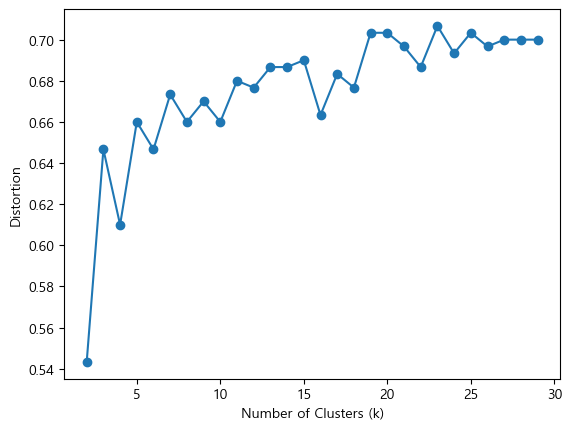

In [17]:
def knn(k):
    cluster_knn = KNeighborsClassifier( n_neighbors=k )
    return cluster_knn

accuracy = list()

for k in list(range(2,30)):
    model_knn = knn(k).fit( x_train, y_train )
    y_pred = model_knn.predict( x_test )
    accuracy.append(accuracy_score(y_test, y_pred))
    print( 'k=',k,'일 경우:', 'Accuracy: ', accuracy_score(y_test, y_pred).round(4) )
    
# k에 따른 inertia의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot(range(2,30), accuracy, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()